# Wrangle and Analyze Data

**The dataset that was wrangled, analyzed and visualized is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog**

------------------------------------------------------
# Goal
**Wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations**

------------------------------------------------------

# Project Details:

**An Enhanced Twitter Archive has been provided by Udacity to facilitate Wrangling process, the archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which was used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, the archive was filtered for tweets with ratings only (there are 2356).**

**Addtionally, Udacity provided an image predictions file that can classify breeds of dogs. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).**

**It is part of the requirements for this project to gather additional data via the Twitter API [Tweepy](http://www.tweepy.org/) and store the Retweet Count and Favorite Count of the tweets provided in the Enhanced Twitter Archive. The garthering of this data has been performed in this project.**

## Key Points:

**Key points to keep in mind when data wrangling for this project:**

>**- We only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.**
   
>**- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 quality issues in this dataset.**
    
>**- Cleaning includes merging individual pieces of data according to the rules of tidy data.**
    
>**- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.**
    
>**- We do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.**

------------------------------------------------------

# Project Tasks


**- Data wrangling, which consists of:**
        * Gathering data
        * Assessing data
        * Cleaning data
**- Storing, analyzing, and visualizing your wrangled data**
**- Reporting on:**
        * Data wrangling efforts 
        * Data analyses and visualizations
        
------------------------------------------------------


# Project Table of Contents
>## - [Gather](#Gather)
>>   ### - [Requirements # 1: The WeRateDogs Twitter archive](#Requirements-#-1:-The-WeRateDogs-Twitter-archive)
>>   ### - [Requirements # 2: The Tweet Image Predictions](#Requirements-#-2:-The-Tweet-Image-Predictions)
>>   ### - [Requirements # 3: Store Tweets JSON Data Using Tweepy](#Requirements-#-3:-Store-Tweets-JSON-Data-Using-Tweepy)

>## - [Assess](#Assess)
>>   ### - [Requirements: Detect and document at least (8) quality issues and (2) tidiness issues](#Requirements:-Detect-and-document-at-least-8-quality-issues-and-2-tidiness-issues)
>>>   #### - [Assessing The WeRateDogs Twitter archive](#Assessing-The-WeRateDogs-Twitter-Archive)
>>>   #### - [Assessing The Tweet Image Predictions](#Assessing-The-Tweet-Image-Predictions)
>>>   #### - [Assessing Downloaded Tweets Data using Tweepy](#Assessing-Downloaded-Tweets-Data-using-Tweepy)

>>   ### - [Assessment Summary](#Assessment-Summary)

>## - [Clean](#Clean)
>>   ### - [Quality Cleaning](#Quality-Cleaning)
>>   ### - [Tidiness Cleaning](#Tidiness-Cleaning)

>## - [Storing, Analyzing, and Visualizing](#Storing,-Analyzing,-and-Visualizing)
>>   ### - [Insight #1 - Highest and Lowest Rated Dog](#Insight-#1---Highest-and-Lowest-Rated-Dog)
>>   ### - [Insight #2 - Top Favorite Count of a Tweet](#Insight-#2---Top-Favorite-Count-of-a-Tweet)
>>   ### - [Insight #3 - Tweet Sources](#Insight-#3---Tweet-Sources)
>>   ### - [Visualization #1 - Top 10 Favoritted Dogs by Favorite Count](#Visualization-#1---Top-10-Favoritted-Dogs-by-Favorite-Count)
>>   ### - [Visualization #2 - Successful Breed Prediction for Algorithm P1](#Visualization-#2---Successful-Breed-Prediction-for-Algorithm-P1)

>## - [References](#References)


In [976]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
from tweepy.parsers import JSONParser
import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

# Gather

## Requirements # 1: The WeRateDogs Twitter archive

### **`Reading the twitter provided archive`**

In [679]:
# read the twitter archive in twdf dataset
twdf = pd.read_csv('twitter-archive-enhanced.csv')
twdf.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Requirements # 2: The Tweet Image Predictions

### **`Gather the tweet image predictions which is hosted in Udacity's servers`**

In [571]:
#folder_name = 'image_predictions'
#if not os.path.exists(folder_name):
#    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# check response code
response
    


<Response [200]>

### **`Save the provided image_predictions file`**

In [572]:
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

### **`Read the image-predictions.tsv file`**

In [573]:
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Requirements # 3: Store Tweets JSON Data Using Tweepy

### **`Authorization`** [Useful Guide](https://www.digitalocean.com/community/tutorials/how-to-authenticate-a-python-application-with-twitter-using-tweepy-on-ubuntu-14-04)

In [574]:
consumer_key = '##############'
consumer_secret = '###########'
access_token = '##############'
access_secret = '#############'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
#api = tweepy.API(auth)
api = tweepy.API(auth, parser=JSONParser(), wait_on_rate_limit=True)


### **`Test Reading`**

In [575]:
tweet = api.get_status(887473957103951883,tweet_mode='extended')

In [576]:
print(tweet['id'])
print(tweet['retweet_count'])
print(tweet['favorite_count'])


887473957103951883
18600
69682


In [577]:
df_list = []
errors = []

tweets = twdf['tweet_id']

now = time.time()

for idx, t in enumerate(tweets):

    try:
        start = time.time()
        tweet = api.get_status(t,tweet_mode='extended')
        end = time.time()
        print("Reading Tweet {}/{} ({}%) Completed. Elapsed Time = {}".format((idx+1),len(tweets), round(((idx+1)/len(tweets)) * 100,1), round((end - start),2)))
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        #followers_count = tweet['user']['followers_count']
        df_list.append({'tweet_id':int(t),
                        'retweet_count':int(retweet_count),
                        'favorite_count':int(favorite_count)
                        #,'followers_count':int(followers_count)
            
        })

    
    
    except Exception as e:
        print(str(t) + str(e))
        errors.append(t)

then = time.time()
diff = round(then - now)
minutes = diff // 60
seconds = diff % 60
print("Reading Process Completed. Elapsed Time is {}:{}".format(minutes, seconds))    


Reading Tweet 1/2356 (0.0%) Completed. Elapsed Time = 1.01
Reading Tweet 2/2356 (0.1%) Completed. Elapsed Time = 1.05
Reading Tweet 3/2356 (0.1%) Completed. Elapsed Time = 1.11
Reading Tweet 4/2356 (0.2%) Completed. Elapsed Time = 1.09
Reading Tweet 5/2356 (0.2%) Completed. Elapsed Time = 1.1
Reading Tweet 6/2356 (0.3%) Completed. Elapsed Time = 1.17
Reading Tweet 7/2356 (0.3%) Completed. Elapsed Time = 1.04
Reading Tweet 8/2356 (0.3%) Completed. Elapsed Time = 1.0
Reading Tweet 9/2356 (0.4%) Completed. Elapsed Time = 1.0
Reading Tweet 10/2356 (0.4%) Completed. Elapsed Time = 0.99
Reading Tweet 11/2356 (0.5%) Completed. Elapsed Time = 0.98
Reading Tweet 12/2356 (0.5%) Completed. Elapsed Time = 0.99
Reading Tweet 13/2356 (0.6%) Completed. Elapsed Time = 1.08
Reading Tweet 14/2356 (0.6%) Completed. Elapsed Time = 1.01
Reading Tweet 15/2356 (0.6%) Completed. Elapsed Time = 1.03
Reading Tweet 16/2356 (0.7%) Completed. Elapsed Time = 1.01
Reading Tweet 17/2356 (0.7%) Completed. Elapsed Time

Reading Tweet 137/2356 (5.8%) Completed. Elapsed Time = 1.0
Reading Tweet 138/2356 (5.9%) Completed. Elapsed Time = 1.0
Reading Tweet 139/2356 (5.9%) Completed. Elapsed Time = 1.0
Reading Tweet 140/2356 (5.9%) Completed. Elapsed Time = 0.96
Reading Tweet 141/2356 (6.0%) Completed. Elapsed Time = 1.0
Reading Tweet 142/2356 (6.0%) Completed. Elapsed Time = 1.0
Reading Tweet 143/2356 (6.1%) Completed. Elapsed Time = 1.0
Reading Tweet 144/2356 (6.1%) Completed. Elapsed Time = 0.98
Reading Tweet 145/2356 (6.2%) Completed. Elapsed Time = 0.94
Reading Tweet 146/2356 (6.2%) Completed. Elapsed Time = 0.99
Reading Tweet 147/2356 (6.2%) Completed. Elapsed Time = 0.93
Reading Tweet 148/2356 (6.3%) Completed. Elapsed Time = 0.89
Reading Tweet 149/2356 (6.3%) Completed. Elapsed Time = 0.93
Reading Tweet 150/2356 (6.4%) Completed. Elapsed Time = 0.9
Reading Tweet 151/2356 (6.4%) Completed. Elapsed Time = 0.91
Reading Tweet 152/2356 (6.5%) Completed. Elapsed Time = 0.99
Reading Tweet 153/2356 (6.5%) C

Reading Tweet 271/2356 (11.5%) Completed. Elapsed Time = 0.68
Reading Tweet 272/2356 (11.5%) Completed. Elapsed Time = 0.64
Reading Tweet 273/2356 (11.6%) Completed. Elapsed Time = 0.66
Reading Tweet 274/2356 (11.6%) Completed. Elapsed Time = 0.64
Reading Tweet 275/2356 (11.7%) Completed. Elapsed Time = 0.63
Reading Tweet 276/2356 (11.7%) Completed. Elapsed Time = 0.63
Reading Tweet 277/2356 (11.8%) Completed. Elapsed Time = 0.66
Reading Tweet 278/2356 (11.8%) Completed. Elapsed Time = 0.67
Reading Tweet 279/2356 (11.8%) Completed. Elapsed Time = 0.67
Reading Tweet 280/2356 (11.9%) Completed. Elapsed Time = 0.66
Reading Tweet 281/2356 (11.9%) Completed. Elapsed Time = 0.65
Reading Tweet 282/2356 (12.0%) Completed. Elapsed Time = 0.64
Reading Tweet 283/2356 (12.0%) Completed. Elapsed Time = 0.64
Reading Tweet 284/2356 (12.1%) Completed. Elapsed Time = 0.7
Reading Tweet 285/2356 (12.1%) Completed. Elapsed Time = 0.69
Reading Tweet 286/2356 (12.1%) Completed. Elapsed Time = 0.69
Reading T

Reading Tweet 403/2356 (17.1%) Completed. Elapsed Time = 0.65
Reading Tweet 404/2356 (17.1%) Completed. Elapsed Time = 0.63
Reading Tweet 405/2356 (17.2%) Completed. Elapsed Time = 0.66
Reading Tweet 406/2356 (17.2%) Completed. Elapsed Time = 0.68
Reading Tweet 407/2356 (17.3%) Completed. Elapsed Time = 0.66
Reading Tweet 408/2356 (17.3%) Completed. Elapsed Time = 0.66
Reading Tweet 409/2356 (17.4%) Completed. Elapsed Time = 0.65
Reading Tweet 410/2356 (17.4%) Completed. Elapsed Time = 0.76
Reading Tweet 411/2356 (17.4%) Completed. Elapsed Time = 0.71
Reading Tweet 412/2356 (17.5%) Completed. Elapsed Time = 0.66
Reading Tweet 413/2356 (17.5%) Completed. Elapsed Time = 0.69
Reading Tweet 414/2356 (17.6%) Completed. Elapsed Time = 0.69
Reading Tweet 415/2356 (17.6%) Completed. Elapsed Time = 0.83
Reading Tweet 416/2356 (17.7%) Completed. Elapsed Time = 0.71
Reading Tweet 417/2356 (17.7%) Completed. Elapsed Time = 0.69
Reading Tweet 418/2356 (17.7%) Completed. Elapsed Time = 0.67
Reading 

Reading Tweet 536/2356 (22.8%) Completed. Elapsed Time = 0.7
Reading Tweet 537/2356 (22.8%) Completed. Elapsed Time = 0.67
Reading Tweet 538/2356 (22.8%) Completed. Elapsed Time = 0.7
Reading Tweet 539/2356 (22.9%) Completed. Elapsed Time = 0.69
Reading Tweet 540/2356 (22.9%) Completed. Elapsed Time = 0.67
Reading Tweet 541/2356 (23.0%) Completed. Elapsed Time = 0.66
Reading Tweet 542/2356 (23.0%) Completed. Elapsed Time = 0.8
Reading Tweet 543/2356 (23.0%) Completed. Elapsed Time = 0.68
Reading Tweet 544/2356 (23.1%) Completed. Elapsed Time = 0.69
Reading Tweet 545/2356 (23.1%) Completed. Elapsed Time = 0.67
Reading Tweet 546/2356 (23.2%) Completed. Elapsed Time = 0.68
Reading Tweet 547/2356 (23.2%) Completed. Elapsed Time = 0.66
Reading Tweet 548/2356 (23.3%) Completed. Elapsed Time = 0.74
Reading Tweet 549/2356 (23.3%) Completed. Elapsed Time = 0.68
Reading Tweet 550/2356 (23.3%) Completed. Elapsed Time = 0.75
Reading Tweet 551/2356 (23.4%) Completed. Elapsed Time = 0.66
Reading Twe

Reading Tweet 669/2356 (28.4%) Completed. Elapsed Time = 0.65
Reading Tweet 670/2356 (28.4%) Completed. Elapsed Time = 0.66
Reading Tweet 671/2356 (28.5%) Completed. Elapsed Time = 0.65
Reading Tweet 672/2356 (28.5%) Completed. Elapsed Time = 0.66
Reading Tweet 673/2356 (28.6%) Completed. Elapsed Time = 0.65
Reading Tweet 674/2356 (28.6%) Completed. Elapsed Time = 0.64
Reading Tweet 675/2356 (28.7%) Completed. Elapsed Time = 0.65
Reading Tweet 676/2356 (28.7%) Completed. Elapsed Time = 0.65
Reading Tweet 677/2356 (28.7%) Completed. Elapsed Time = 0.68
Reading Tweet 678/2356 (28.8%) Completed. Elapsed Time = 0.73
Reading Tweet 679/2356 (28.8%) Completed. Elapsed Time = 0.64
Reading Tweet 680/2356 (28.9%) Completed. Elapsed Time = 0.66
Reading Tweet 681/2356 (28.9%) Completed. Elapsed Time = 0.67
Reading Tweet 682/2356 (28.9%) Completed. Elapsed Time = 0.67
Reading Tweet 683/2356 (29.0%) Completed. Elapsed Time = 0.68
Reading Tweet 684/2356 (29.0%) Completed. Elapsed Time = 0.65
Reading 

Reading Tweet 802/2356 (34.0%) Completed. Elapsed Time = 0.67
Reading Tweet 803/2356 (34.1%) Completed. Elapsed Time = 0.67
Reading Tweet 804/2356 (34.1%) Completed. Elapsed Time = 0.66
Reading Tweet 805/2356 (34.2%) Completed. Elapsed Time = 0.68
Reading Tweet 806/2356 (34.2%) Completed. Elapsed Time = 0.65
Reading Tweet 807/2356 (34.3%) Completed. Elapsed Time = 0.68
Reading Tweet 808/2356 (34.3%) Completed. Elapsed Time = 0.69
Reading Tweet 809/2356 (34.3%) Completed. Elapsed Time = 0.66
Reading Tweet 810/2356 (34.4%) Completed. Elapsed Time = 0.64
Reading Tweet 811/2356 (34.4%) Completed. Elapsed Time = 0.64
Reading Tweet 812/2356 (34.5%) Completed. Elapsed Time = 0.65
Reading Tweet 813/2356 (34.5%) Completed. Elapsed Time = 0.68
Reading Tweet 814/2356 (34.6%) Completed. Elapsed Time = 0.67
Reading Tweet 815/2356 (34.6%) Completed. Elapsed Time = 0.68
Reading Tweet 816/2356 (34.6%) Completed. Elapsed Time = 0.69
Reading Tweet 817/2356 (34.7%) Completed. Elapsed Time = 0.66
Reading 

Reading Tweet 935/2356 (39.7%) Completed. Elapsed Time = 0.67
Reading Tweet 936/2356 (39.7%) Completed. Elapsed Time = 0.69
Reading Tweet 937/2356 (39.8%) Completed. Elapsed Time = 0.64
Reading Tweet 938/2356 (39.8%) Completed. Elapsed Time = 0.64
Reading Tweet 939/2356 (39.9%) Completed. Elapsed Time = 0.67
Reading Tweet 940/2356 (39.9%) Completed. Elapsed Time = 0.67
Reading Tweet 941/2356 (39.9%) Completed. Elapsed Time = 0.68
Reading Tweet 942/2356 (40.0%) Completed. Elapsed Time = 0.72
Reading Tweet 943/2356 (40.0%) Completed. Elapsed Time = 0.7
Reading Tweet 944/2356 (40.1%) Completed. Elapsed Time = 0.65
Reading Tweet 945/2356 (40.1%) Completed. Elapsed Time = 0.64
Reading Tweet 946/2356 (40.2%) Completed. Elapsed Time = 0.64
Reading Tweet 947/2356 (40.2%) Completed. Elapsed Time = 0.68
Reading Tweet 948/2356 (40.2%) Completed. Elapsed Time = 0.63
Reading Tweet 949/2356 (40.3%) Completed. Elapsed Time = 0.69
Reading Tweet 950/2356 (40.3%) Completed. Elapsed Time = 0.66
Reading T

Reading Tweet 1067/2356 (45.3%) Completed. Elapsed Time = 0.65
Reading Tweet 1068/2356 (45.3%) Completed. Elapsed Time = 0.7
Reading Tweet 1069/2356 (45.4%) Completed. Elapsed Time = 0.66
Reading Tweet 1070/2356 (45.4%) Completed. Elapsed Time = 0.67
Reading Tweet 1071/2356 (45.5%) Completed. Elapsed Time = 0.69
Reading Tweet 1072/2356 (45.5%) Completed. Elapsed Time = 0.71
Reading Tweet 1073/2356 (45.5%) Completed. Elapsed Time = 0.66
Reading Tweet 1074/2356 (45.6%) Completed. Elapsed Time = 0.88
Reading Tweet 1075/2356 (45.6%) Completed. Elapsed Time = 0.72
Reading Tweet 1076/2356 (45.7%) Completed. Elapsed Time = 0.65
Reading Tweet 1077/2356 (45.7%) Completed. Elapsed Time = 0.69
Reading Tweet 1078/2356 (45.8%) Completed. Elapsed Time = 0.67
Reading Tweet 1079/2356 (45.8%) Completed. Elapsed Time = 0.7
Reading Tweet 1080/2356 (45.8%) Completed. Elapsed Time = 0.66
Reading Tweet 1081/2356 (45.9%) Completed. Elapsed Time = 0.71
Reading Tweet 1082/2356 (45.9%) Completed. Elapsed Time =

Reading Tweet 1198/2356 (50.8%) Completed. Elapsed Time = 0.7
Reading Tweet 1199/2356 (50.9%) Completed. Elapsed Time = 0.67
Reading Tweet 1200/2356 (50.9%) Completed. Elapsed Time = 0.66
Reading Tweet 1201/2356 (51.0%) Completed. Elapsed Time = 0.69
Reading Tweet 1202/2356 (51.0%) Completed. Elapsed Time = 0.67
Reading Tweet 1203/2356 (51.1%) Completed. Elapsed Time = 0.7
Reading Tweet 1204/2356 (51.1%) Completed. Elapsed Time = 0.69
Reading Tweet 1205/2356 (51.1%) Completed. Elapsed Time = 0.69
Reading Tweet 1206/2356 (51.2%) Completed. Elapsed Time = 0.68
Reading Tweet 1207/2356 (51.2%) Completed. Elapsed Time = 0.68
Reading Tweet 1208/2356 (51.3%) Completed. Elapsed Time = 0.74
Reading Tweet 1209/2356 (51.3%) Completed. Elapsed Time = 0.73
Reading Tweet 1210/2356 (51.4%) Completed. Elapsed Time = 0.65
Reading Tweet 1211/2356 (51.4%) Completed. Elapsed Time = 0.65
Reading Tweet 1212/2356 (51.4%) Completed. Elapsed Time = 0.71
Reading Tweet 1213/2356 (51.5%) Completed. Elapsed Time =

Reading Tweet 1325/2356 (56.2%) Completed. Elapsed Time = 0.78
Reading Tweet 1326/2356 (56.3%) Completed. Elapsed Time = 0.7
Reading Tweet 1327/2356 (56.3%) Completed. Elapsed Time = 0.69
Reading Tweet 1328/2356 (56.4%) Completed. Elapsed Time = 0.64
Reading Tweet 1329/2356 (56.4%) Completed. Elapsed Time = 0.76
Reading Tweet 1330/2356 (56.5%) Completed. Elapsed Time = 0.66
Reading Tweet 1331/2356 (56.5%) Completed. Elapsed Time = 0.66
Reading Tweet 1332/2356 (56.5%) Completed. Elapsed Time = 0.68
Reading Tweet 1333/2356 (56.6%) Completed. Elapsed Time = 0.64
Reading Tweet 1334/2356 (56.6%) Completed. Elapsed Time = 0.74
Reading Tweet 1335/2356 (56.7%) Completed. Elapsed Time = 0.69
Reading Tweet 1336/2356 (56.7%) Completed. Elapsed Time = 0.69
Reading Tweet 1337/2356 (56.7%) Completed. Elapsed Time = 0.67
Reading Tweet 1338/2356 (56.8%) Completed. Elapsed Time = 0.65
Reading Tweet 1339/2356 (56.8%) Completed. Elapsed Time = 0.66
Reading Tweet 1340/2356 (56.9%) Completed. Elapsed Time 

Reading Tweet 1456/2356 (61.8%) Completed. Elapsed Time = 0.66
Reading Tweet 1457/2356 (61.8%) Completed. Elapsed Time = 0.66
Reading Tweet 1458/2356 (61.9%) Completed. Elapsed Time = 0.68
Reading Tweet 1459/2356 (61.9%) Completed. Elapsed Time = 0.64
Reading Tweet 1460/2356 (62.0%) Completed. Elapsed Time = 0.65
Reading Tweet 1461/2356 (62.0%) Completed. Elapsed Time = 0.65
Reading Tweet 1462/2356 (62.1%) Completed. Elapsed Time = 0.68
Reading Tweet 1463/2356 (62.1%) Completed. Elapsed Time = 0.8
Reading Tweet 1464/2356 (62.1%) Completed. Elapsed Time = 0.67
Reading Tweet 1465/2356 (62.2%) Completed. Elapsed Time = 0.79
Reading Tweet 1466/2356 (62.2%) Completed. Elapsed Time = 0.69
Reading Tweet 1467/2356 (62.3%) Completed. Elapsed Time = 0.71
Reading Tweet 1468/2356 (62.3%) Completed. Elapsed Time = 0.65
Reading Tweet 1469/2356 (62.4%) Completed. Elapsed Time = 0.65
Reading Tweet 1470/2356 (62.4%) Completed. Elapsed Time = 0.65
Reading Tweet 1471/2356 (62.4%) Completed. Elapsed Time 

Reading Tweet 1583/2356 (67.2%) Completed. Elapsed Time = 0.7
Reading Tweet 1584/2356 (67.2%) Completed. Elapsed Time = 0.67
Reading Tweet 1585/2356 (67.3%) Completed. Elapsed Time = 0.68
Reading Tweet 1586/2356 (67.3%) Completed. Elapsed Time = 0.78
Reading Tweet 1587/2356 (67.4%) Completed. Elapsed Time = 0.68
Reading Tweet 1588/2356 (67.4%) Completed. Elapsed Time = 0.68
Reading Tweet 1589/2356 (67.4%) Completed. Elapsed Time = 0.65
Reading Tweet 1590/2356 (67.5%) Completed. Elapsed Time = 0.68
Reading Tweet 1591/2356 (67.5%) Completed. Elapsed Time = 0.66
Reading Tweet 1592/2356 (67.6%) Completed. Elapsed Time = 0.67
Reading Tweet 1593/2356 (67.6%) Completed. Elapsed Time = 0.65
Reading Tweet 1594/2356 (67.7%) Completed. Elapsed Time = 0.65
Reading Tweet 1595/2356 (67.7%) Completed. Elapsed Time = 0.65
Reading Tweet 1596/2356 (67.7%) Completed. Elapsed Time = 0.74
Reading Tweet 1597/2356 (67.8%) Completed. Elapsed Time = 0.68
Reading Tweet 1598/2356 (67.8%) Completed. Elapsed Time 

Reading Tweet 1714/2356 (72.8%) Completed. Elapsed Time = 0.65
Reading Tweet 1715/2356 (72.8%) Completed. Elapsed Time = 0.66
Reading Tweet 1716/2356 (72.8%) Completed. Elapsed Time = 0.71
Reading Tweet 1717/2356 (72.9%) Completed. Elapsed Time = 0.65
Reading Tweet 1718/2356 (72.9%) Completed. Elapsed Time = 0.67
Reading Tweet 1719/2356 (73.0%) Completed. Elapsed Time = 0.81
Reading Tweet 1720/2356 (73.0%) Completed. Elapsed Time = 0.66
Reading Tweet 1721/2356 (73.0%) Completed. Elapsed Time = 0.65
Reading Tweet 1722/2356 (73.1%) Completed. Elapsed Time = 0.69
Reading Tweet 1723/2356 (73.1%) Completed. Elapsed Time = 0.66
Reading Tweet 1724/2356 (73.2%) Completed. Elapsed Time = 0.73
Reading Tweet 1725/2356 (73.2%) Completed. Elapsed Time = 0.84
Reading Tweet 1726/2356 (73.3%) Completed. Elapsed Time = 0.66
Reading Tweet 1727/2356 (73.3%) Completed. Elapsed Time = 0.68
Reading Tweet 1728/2356 (73.3%) Completed. Elapsed Time = 0.73
Reading Tweet 1729/2356 (73.4%) Completed. Elapsed Time

Reading Tweet 1845/2356 (78.3%) Completed. Elapsed Time = 0.65
Reading Tweet 1846/2356 (78.4%) Completed. Elapsed Time = 0.73
Reading Tweet 1847/2356 (78.4%) Completed. Elapsed Time = 0.65
Reading Tweet 1848/2356 (78.4%) Completed. Elapsed Time = 0.71
Reading Tweet 1849/2356 (78.5%) Completed. Elapsed Time = 0.7
Reading Tweet 1850/2356 (78.5%) Completed. Elapsed Time = 0.67
Reading Tweet 1851/2356 (78.6%) Completed. Elapsed Time = 0.7
Reading Tweet 1852/2356 (78.6%) Completed. Elapsed Time = 0.69
Reading Tweet 1853/2356 (78.7%) Completed. Elapsed Time = 0.67
Reading Tweet 1854/2356 (78.7%) Completed. Elapsed Time = 0.64
Reading Tweet 1855/2356 (78.7%) Completed. Elapsed Time = 0.77
Reading Tweet 1856/2356 (78.8%) Completed. Elapsed Time = 0.88
Reading Tweet 1857/2356 (78.8%) Completed. Elapsed Time = 0.68
Reading Tweet 1858/2356 (78.9%) Completed. Elapsed Time = 0.7
Reading Tweet 1859/2356 (78.9%) Completed. Elapsed Time = 0.66
Reading Tweet 1860/2356 (78.9%) Completed. Elapsed Time = 

Reading Tweet 1976/2356 (83.9%) Completed. Elapsed Time = 0.76
Reading Tweet 1977/2356 (83.9%) Completed. Elapsed Time = 0.65
Reading Tweet 1978/2356 (84.0%) Completed. Elapsed Time = 0.68
Reading Tweet 1979/2356 (84.0%) Completed. Elapsed Time = 0.66
Reading Tweet 1980/2356 (84.0%) Completed. Elapsed Time = 0.66
Reading Tweet 1981/2356 (84.1%) Completed. Elapsed Time = 0.69
Reading Tweet 1982/2356 (84.1%) Completed. Elapsed Time = 0.66
Reading Tweet 1983/2356 (84.2%) Completed. Elapsed Time = 0.64
Reading Tweet 1984/2356 (84.2%) Completed. Elapsed Time = 0.68
Reading Tweet 1985/2356 (84.3%) Completed. Elapsed Time = 0.67
Reading Tweet 1986/2356 (84.3%) Completed. Elapsed Time = 0.63
Reading Tweet 1987/2356 (84.3%) Completed. Elapsed Time = 0.66
Reading Tweet 1988/2356 (84.4%) Completed. Elapsed Time = 0.68
Reading Tweet 1989/2356 (84.4%) Completed. Elapsed Time = 0.67
Reading Tweet 1990/2356 (84.5%) Completed. Elapsed Time = 0.75
Reading Tweet 1991/2356 (84.5%) Completed. Elapsed Time

Reading Tweet 2107/2356 (89.4%) Completed. Elapsed Time = 0.64
Reading Tweet 2108/2356 (89.5%) Completed. Elapsed Time = 0.71
Reading Tweet 2109/2356 (89.5%) Completed. Elapsed Time = 0.7
Reading Tweet 2110/2356 (89.6%) Completed. Elapsed Time = 0.67
Reading Tweet 2111/2356 (89.6%) Completed. Elapsed Time = 0.65
Reading Tweet 2112/2356 (89.6%) Completed. Elapsed Time = 0.72
Reading Tweet 2113/2356 (89.7%) Completed. Elapsed Time = 0.67
Reading Tweet 2114/2356 (89.7%) Completed. Elapsed Time = 0.72
Reading Tweet 2115/2356 (89.8%) Completed. Elapsed Time = 0.67
Reading Tweet 2116/2356 (89.8%) Completed. Elapsed Time = 0.68
Reading Tweet 2117/2356 (89.9%) Completed. Elapsed Time = 0.75
Reading Tweet 2118/2356 (89.9%) Completed. Elapsed Time = 0.66
Reading Tweet 2119/2356 (89.9%) Completed. Elapsed Time = 0.64
Reading Tweet 2120/2356 (90.0%) Completed. Elapsed Time = 0.65
Reading Tweet 2121/2356 (90.0%) Completed. Elapsed Time = 0.68
Reading Tweet 2122/2356 (90.1%) Completed. Elapsed Time 

Reading Tweet 2238/2356 (95.0%) Completed. Elapsed Time = 0.75
Reading Tweet 2239/2356 (95.0%) Completed. Elapsed Time = 0.7
Reading Tweet 2240/2356 (95.1%) Completed. Elapsed Time = 0.7
Reading Tweet 2241/2356 (95.1%) Completed. Elapsed Time = 0.69
Reading Tweet 2242/2356 (95.2%) Completed. Elapsed Time = 0.66
Reading Tweet 2243/2356 (95.2%) Completed. Elapsed Time = 0.68
Reading Tweet 2244/2356 (95.2%) Completed. Elapsed Time = 0.65
Reading Tweet 2245/2356 (95.3%) Completed. Elapsed Time = 0.66
Reading Tweet 2246/2356 (95.3%) Completed. Elapsed Time = 0.73
Reading Tweet 2247/2356 (95.4%) Completed. Elapsed Time = 0.71
Reading Tweet 2248/2356 (95.4%) Completed. Elapsed Time = 0.66
Reading Tweet 2249/2356 (95.5%) Completed. Elapsed Time = 0.75
Reading Tweet 2250/2356 (95.5%) Completed. Elapsed Time = 0.63
Reading Tweet 2251/2356 (95.5%) Completed. Elapsed Time = 0.65
Reading Tweet 2252/2356 (95.6%) Completed. Elapsed Time = 0.73
Reading Tweet 2253/2356 (95.6%) Completed. Elapsed Time =

### **`Erroneous Tweet IDs `**

In [579]:
errors


[888202515573088257,
 873697596434513921,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 802247111496568832,
 775096608509886464,
 707297311098011648,
 689289219123089408]

### **`Re-trying Reading the Erroneous Tweet IDs `**

In [580]:
for idx,t in enumerate(errors):

    try:
        start = time.time()
        tweet = api.get_status(t,tweet_mode='extended')
        end = time.time()
        print("Reading Tweet {}/{} Completed. Elapsed Time = {}".format((idx+1),len(tweets), round((end - start),2)))
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        #followers_count = tweet['user']['followers_count']
        df_list.append({'tweet_id':int(t),
                        'retweet_count':int(retweet_count),
                        'favorite_count':int(favorite_count)
                        #,'followers_count':int(followers_count)
            
        })

    
    
    except Exception as e:
        print(str(t) + str(e))
        #errors.append(t)

888202515573088257[{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921[{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329[{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744[{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320[{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648[{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
827228250799742977[{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832[{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464[{'code': 144, 'message': 'No status found with that ID.'}]
Reading Tweet 11/2356 Completed. Elapsed Time = 0.66
Reading Tweet 12/2356 Completed. Elapsed Time = 0.69


### **`Save Downloaded Tweets Data into tweet_json.txt`**

In [581]:
df_json = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count']) #, 'followers_count'])
df_json.to_csv('tweet_json.txt', encoding = 'utf-8')

In [582]:
df_json = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
#df_json.set_index('tweet_id', inplace = True)
df_json.head()

,Unnamed: 0,tweet_id,retweet_count,favorite_count
0,0,892420643555336193,8698,39116
1,1,892177421306343426,6385,33500
2,2,891815181378084864,4240,25247
3,3,891689557279858688,8797,42478
4,4,891327558926688256,9576,40636


# Assess

#### **Subjects of assessment:**

**`1- The WeRateDogs Twitter archive (twdf)`**

**`2- The Tweet Image Predictions (image_predictions)`**

**`3- Downloaded Tweets Data using Tweepy (df_json)`**


#### **Assessment Plan:**

**`To spot quality issues with the subjects, I will run/check the following in every dataset`**


```

* Dataset info:
        - Check column names
        - Validate data types
        - Number of data entries per column

* Duplicates check:
        - Check for duplicated rows
        
* View (10) samples:
        - Check validity and quality of entries

* Value Counts:
        - Check validity and quality of entries
```

## Requirements: Detect and document at least 8 quality issues and 2 tidiness issues


### Assessing The WeRateDogs Twitter Archive

In [583]:
twdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

_**Observations:**_
- twdf dataset contains 2356 rows and 17 columns
- There are null values in some of the columns
- timestamp datatype is incorrect
- tweet_id datatype is integer while it should be converted to string

In [584]:
twdf[twdf.duplicated]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


_**No observations of duplicates**_

In [585]:
twdf.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1841,675878199931371520,NaN,NaN,2015-12-13 03:21:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Ok, I'll admit this is a pretty adorable bunny...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/675878199...,11,10,None,None,None,None,None
561,802624713319034886,NaN,NaN,2016-11-26 21:26:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Yep... just as I suspected. Yo...",7.776842e+17,4.196984e+09,2016-09-19 01:42:24 +0000,https://twitter.com/dog_rates/status/777684233...,12,10,None,None,None,None,None
1987,672877615439593473,NaN,NaN,2015-12-04 20:38:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar. He's getting bombarded with the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672877615...,8,10,Oscar,None,None,None,None
1676,682088079302213632,NaN,NaN,2015-12-30 06:37:25 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",I'm not sure what this dog is doing but it's p...,NaN,NaN,NaN,https://vine.co/v/iqMjlxULzbn,12,10,None,None,None,None,None
1835,676101918813499392,NaN,NaN,2015-12-13 18:10:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Striker. He's ready for Christmas. 11/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676101918...,11,10,Striker,None,None,None,None
522,809808892968534016,NaN,NaN,2016-12-16 17:14:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Maximus. His face is st...,7.939622e+17,4.196984e+09,2016-11-02 23:45:19 +0000,https://twitter.com/dog_rates/status/793962221...,12,10,Maximus,None,None,None,None
1034,745057283344719872,NaN,NaN,2016-06-21 00:54:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He's downright gorgeous as hel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745057283...,12,10,Oliver,None,None,None,None
1495,692535307825213440,NaN,NaN,2016-01-28 02:30:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Amber. She's a Fetty Woof. 10/10 would...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692535307...,10,10,Amber,None,None,None,None
1524,690597161306841088,NaN,NaN,2016-01-22 18:09:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lolo. She's America af. Behind in scie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690597161...,11,10,Lolo,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None


_**Observations:**_
- There are missing values (nulls) in these columns:
    * in_reply_to_status_id
    * in_reply_to_user_id
    * retweeted_status_id
    * retweeted_status_user_id
    * retweeted_status_timestamp 	
    
- Invalid names of dogs
    * none is given for missing dog name
    * (a) is not name, probably missing or incorrect value 

- Missing values in the dog breed columns which was filled with 'None'
- Unnecessary characters in timestamp (+0000)

In [586]:
twdf.rating_numerator.value_counts().sort_values()

20        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
26        1
182       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
143       1
24        1
204       1
80        1
121       1
75        2
15        2
0         2
420       2
2         9
1         9
4        17
3        19
6        32
5        37
14       54
7        55
8       102
9       158
13      351
10      461
11      464
12      558
Name: rating_numerator, dtype: int64

_**Observations:**_
- Rating numerator values of 0 or 1 might have been misstyped. More investigatation below

In [666]:
# list tweets with 0 or 1 numerator

twdf[(twdf['rating_numerator'] == 0) | (twdf['rating_numerator'] == 1)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None
1446,696490539101908992,6.964887e+17,4.196984e+09,2016-02-08 00:27:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After reading the comments I may have overesti...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
1869,675153376133427200,NaN,NaN,2015-12-11 03:21:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a picture without...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675153376...,1,10,None,None,None,None,None
1940,673716320723169284,6.737159e+17,4.196984e+09,2015-12-07 04:11:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The millennials have spoken and we've decided ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2091,670783437142401025,NaN,NaN,2015-11-29 01:56:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Flamboyant pup here. Probably poisonous. Won't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670783437...,1,10,None,None,None,None,None
2261,667549055577362432,NaN,NaN,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055...,1,10,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


_**Observations:**_

Tweet ID|Tweet Text|Observation|
:--------|:----------|:-----------|
[835152434251116546](https://twitter.com/dog_rates/status/835152434251116546)|When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 | Not related tweet|
[746906459439529985](https://twitter.com/dog_rates/status/746906459439529985)|PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment| Not related tweet|
[798576900688019456](https://twitter.com/dog_rates/status/666104133288665088)|Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 | Not related tweet|
[696490539101908992](https://twitter.com/dog_rates/status/696490539101908992)|After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me|Valid rating |
[675153376133427200](https://twitter.com/dog_rates/status/675153376133427200)|What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table |Not related tweet |
[673716320723169284](https://twitter.com/dog_rates/status/673716320723169284)|The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you | Not related tweet|
[671550332464455680](https://twitter.com/dog_rates/status/671550332464455680)| After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes| Not related tweet|
[670783437142401025](https://twitter.com/dog_rates/status/670783437142401025)| Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10| Not related tweet |
[667549055577362432](https://twitter.com/dog_rates/status/667549055577362432)|Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 |  Not related tweet |
[666287406224695296](https://twitter.com/dog_rates/status/666287406224695296)|This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 | Change to 9/10 rating|
[666104133288665088](https://twitter.com/dog_rates/status/666104133288665088)|Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 |Not related tweet |

(10) Tweets to remove:
* 835152434251116546
* 798576900688019456
* 746906459439529985
* 675153376133427200
* 673716320723169284
* 671550332464455680
* 670783437142401025
* 667549055577362432
* 666287406224695296
* 666104133288665088	

In [770]:
twdf[twdf['tweet_id']==786709082849828864]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None


_**Observations:**_
- The tweet 786709082849828864 rating is not correct. Tweet text "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10" 

In [588]:
twdf.rating_denominator.value_counts().sort_values()

70        1
170       1
150       1
130       1
120       1
110       1
90        1
15        1
0         1
40        1
16        1
2         1
7         1
20        2
80        2
50        3
11        3
10     2333
Name: rating_denominator, dtype: int64

_**Observations:**_
- Rating denominator value should always be 10, there are many incorrect denominators 

In [589]:
twdf.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Lucy             11
Oliver           11
Lola             10
Tucker           10
Penny            10
Winston           9
Bo                9
the               8
Sadie             8
Toby              7
Bailey            7
Daisy             7
an                7
Buddy             7
Koda              6
Stanley           6
Oscar             6
Jack              6
Jax               6
Bella             6
Milo              6
Leo               6
Dave              6
Scout             6
Rusty             6
Larry             5
               ... 
Thor              1
Shooter           1
Siba              1
unacceptable      1
Rooney            1
Bauer             1
Kanu              1
Maya              1
Bilbo             1
Tino              1
Jangle            1
Pip               1
Kellogg           1
Tom               1
Akumi             1
Mojo              1
Jeffrie           1
Brady             1
Damon             1


_**Observations:**_
- Incorrect dog names exist in the name column like none, a, the

### Assessing The Tweet Image Predictions

In [590]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


_**Observations:**_
- image_predictions dataset contains 2075 rows and 12 columns

In [591]:
image_predictions[image_predictions.duplicated]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


_**No observations of duplicates**_

In [592]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
49,666835007768551424,https://pbs.twimg.com/media/CUES51dXIAEahyG.jpg,1,Airedale,0.448459,True,toy_poodle,0.124030,True,teddy,0.110183,False
520,676533798876651520,https://pbs.twimg.com/media/CWOH4s9U8AEtkmQ.jpg,1,chow,0.265274,True,ice_bear,0.167614,False,fur_coat,0.117506,False
551,677557565589463040,https://pbs.twimg.com/media/CWcrAVQWEAA6QMp.jpg,1,seat_belt,0.277257,False,Shih-Tzu,0.249017,True,Pekinese,0.209213,True
65,667174963120574464,https://pbs.twimg.com/media/CUJIFoJWsAAL3Dc.jpg,1,toy_poodle,0.266437,True,Chihuahua,0.243223,True,bluetick,0.072806,True
1379,764857477905154048,https://pbs.twimg.com/media/Cp1R0ZTWcAAaPO4.jpg,1,Bernese_mountain_dog,0.792059,True,Appenzeller,0.155034,True,EntleBucher,0.038374,True
1633,805932879469572096,https://pbs.twimg.com/media/Cy8_qt0UUAAHuuN.jpg,1,Norwegian_elkhound,0.657967,True,keeshond,0.319136,True,Leonberg,0.007947,True
347,672475084225949696,https://pbs.twimg.com/media/CVUchRHXAAE4rtp.jpg,1,terrapin,0.879286,False,cockroach,0.045252,False,box_turtle,0.016404,False
1802,832032802820481025,https://pbs.twimg.com/media/C4v5a4UWcAIRygc.jpg,1,whippet,0.601712,True,Ibizan_hound,0.152662,True,Italian_greyhound,0.135055,True
1867,843856843873095681,https://pbs.twimg.com/media/C7X7Ui0XgAA3m19.jpg,1,Labrador_retriever,0.922540,True,golden_retriever,0.074358,True,Great_Pyrenees,0.002325,True
1523,788150585577050112,https://pbs.twimg.com/media/CvASw6dWcAQmo3X.jpg,3,chow,0.814145,True,Pomeranian,0.112704,True,Chihuahua,0.015883,True


_**No observations in the sample.**_

In [593]:
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

_**No observations in the count.**_

### Assessing Downloaded Tweets Data using Tweepy

In [594]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 4 columns):
Unnamed: 0        2346 non-null int64
tweet_id          2346 non-null int64
retweet_count     2346 non-null int64
favorite_count    2346 non-null int64
dtypes: int64(4)
memory usage: 73.4 KB


_**Observations:**_
- df_json dataset contains 2347 rows and 3 columns
- Total tweets in the twdf is 2356 while here we have 2347 predicted.
- (Unnamed: 0) column is invalid
- (9) missing tweets that could not be read:
    * 888202515573088257
    * 873697596434513921
    * 869988702071779329
    * 866816280283807744
    * 861769973181624320
    * 842892208864923648
    * 827228250799742977
    * 802247111496568832
    * 775096608509886464

In [595]:
df_json[df_json.duplicated]

,Unnamed: 0,tweet_id,retweet_count,favorite_count


_**No observations in the duplicates.**_

--------------------------

# Assessment Summary

## Quality:

No. | Issue | Column(s) | Dataset
----- |:------|:--------|:-------
1 | none is given for missing dog name | name | twdf
2 | Incorrect dog names exist in the name column like none, a, the, an, my | name | twdf
3 | timestamp datatype is incorrect | timestamp | twdf
4 | Unnecessary characters (+0000) | timestamp | twdf
5 | Missing values in the dog breed columns which was filled with 'None' | doggo, floofer, pupper, puppoo | twdf
6 | Remove retweets | in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp  | twdf
7 | Rating numerator values of 0 or 1 might have been miss-typed (Remove 10 tweets) | rating_numerator | twdf
8 | Rating denominator value should always be 10, there are many incorrect denominators  | rating_denominator | twdf
9 | (9) missing tweets that could not be read | tweet_id | df_json
10 | tweet_id datatype needs to be converted to str | tweet_id | twdf
11 | Rating numerator is not reflecting actual rating, need to extract rating from tweet text | rating_numerator | twdf

## Tideness:

No. | Issue | Action | Dataset
----- |:------|:--------|:-------
1 | Dogs breed is splitted into 4 columns | Melt the 4 breeds into a column | twdf
2 | 'Unnamed: 0' column is not needed | Drop the 'Unnamed: 0' column | df_json
3 | Data can be structured into 1 dataset of tweets archive | merge the 3 datasets (enhanced tweet archive, image_predictions, and downloaded JSON data) into 1 and remove unneeded columns | twdf, image_predictions, df_json

# Clean

## Quality Cleaning

----------------------------------------

The cleaning process will be perfomed in the copied dataframes below


In [596]:
# Make a copy of the datasets before cleaning
twdf_clean = twdf.copy()
image_predictions_clean =  image_predictions.copy()
df_json_clean = df_json.copy()

In [597]:
# I am saving the datasets to csvs to avoid re-downloading tweets which takes about 40 minutes
twdf_clean.to_csv('twdf.clean.csv')
image_predictions_clean.to_csv('image_predictions.clean.csv')
df_json_clean.to_csv('df_json.clean.csv')
df_errors = pd.DataFrame(errors, columns = ['tweet_id']) 
df_errors.to_csv('df_errors.csv')

In [1190]:
# Whenever I work on the project, I start from here
twdf_clean = pd.read_csv('twdf.clean.csv')
image_predictions_clean = pd.read_csv('image_predictions.clean.csv')
df_json_clean = pd.read_csv('df_json.clean.csv')
df_errors = pd.read_csv('df_errors.csv')

### Issue # 1 & 2

##### Define

Replace invalid dog names (none, a, the, an) with null

##### Code

In [1191]:
twdf_clean['name'].replace('the', np.nan, inplace=True)
twdf_clean['name'].replace('a', np.nan, inplace=True)
twdf_clean['name'].replace('None', np.nan, inplace=True)
twdf_clean['name'].replace('an', np.nan, inplace=True)
twdf_clean['name'].replace('my', np.nan, inplace=True)

##### Test

In [1192]:
twdf_clean[   (twdf_clean['name'] == "the") 
            | (twdf_clean['name'] == "a") 
            | (twdf_clean['name'] == "None") 
            | (twdf_clean['name'] == "an")
            | (twdf_clean['name'] == "my")
          
          ]

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [1193]:
twdf_clean.sample(5)

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1097,1097,736225175608430592,NaN,NaN,2016-05-27 15:58:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736225175...,10,10,very,None,None,None,None
215,215,851224888060895234,NaN,NaN,2017-04-10 00:06:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Snoop. His number one passion is sticking...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/851224888...,13,10,Snoop,None,None,None,None
814,814,771014301343748096,NaN,NaN,2016-08-31 15:58:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Another pic without a dog in it? What am I sup...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771014301...,7,10,NaN,None,None,None,None
408,408,823581115634085888,NaN,NaN,2017-01-23 17:20:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Crawford. He's quite h*ckin good at th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/823581115...,11,10,Crawford,None,None,None,None
2292,2292,667160273090932737,NaN,NaN,2015-11-19 01:59:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bradlay. He is a Ronaldinho Matsuyama ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667160273...,11,10,Bradlay,None,None,None,None


### Issue # 3 & 4

##### Define

Change the timestamp datatype from object to timestamp

##### Code

In [1194]:
twdf_clean['timestamp'] = pd.to_datetime(twdf_clean['timestamp'])

##### Test

In [1195]:
twdf_clean.head(3)

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### Issue # 5

##### Define

Replace None values for dog breeds with np.nan

##### Code

In [1196]:
twdf_clean['doggo'].replace('None', np.nan, inplace=True)
twdf_clean['floofer'].replace('None', np.nan, inplace=True)
twdf_clean['pupper'].replace('None', np.nan, inplace=True)
twdf_clean['puppo'].replace('None', np.nan, inplace=True)

##### Test

In [1197]:
twdf_clean.head(5)

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


### Issue # 6

##### Define

As we only want original ratings (no retweets) that have images, I will remove the rows that have tweet IDs in the (in_reply_to_status_id and retweeted_status_id) column, and then drop the retweet related columns.

According to [Twitter Dev](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object), **in_reply_to_status_id**: If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID.

It makes sense to have null vlues in the below columns since they are related to retweets.
* in_reply_to_status_id
* in_reply_to_user_id



##### Code

In [1198]:
# Recreate dataset twdf.clean with excluding replys
twdf_clean = twdf_clean[twdf_clean['in_reply_to_status_id'].isnull()]
twdf_clean = twdf_clean[twdf_clean['retweeted_status_id'].isnull()]

##### Test

In [1199]:
twdf_clean[twdf_clean['in_reply_to_status_id'].notnull()]

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [1200]:
twdf_clean[twdf_clean['retweeted_status_id'].notnull()]

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##### Define

Remove the row related to replys
* in_reply_to_status_id
* in_reply_to_user_id

##### Code

In [1201]:
twdf_clean.drop(['in_reply_to_status_id'], axis=1, inplace = True)
twdf_clean.drop(['in_reply_to_user_id'], axis=1, inplace = True)

##### Test

In [1202]:
twdf_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 16 columns):
Unnamed: 0                    2097 non-null int64
tweet_id                      2097 non-null int64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          1424 non-null object
doggo                         83 non-null object
floofer                       10 non-null object
pupper                        230 non-null object
puppo                         24 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(9)
memory usage: 278.5+ KB


So far, the clean dataset contains 2278 tweets

### Issue # 7

##### Define

Delete the (10) Tweets that are not related to dogs rating: (Note: removing replys resulted in shrinking this list to 7 tweets only). The tweets to be deleted are:

* 835152434251116546
* 798576900688019456
* 675153376133427200
* 670783437142401025
* 667549055577362432
* 666287406224695296
* 666104133288665088

##### Code

In [1203]:
#Store the list of tweets that are subject to removal
remove_list = twdf_clean[(twdf_clean['rating_numerator'] == 0) | (twdf_clean['rating_numerator'] == 1)].tweet_id


for i in remove_list:
    print(i)
    


835152434251116546
675153376133427200
670783437142401025
667549055577362432
666287406224695296
666104133288665088


In [1204]:
# Recreate dataset twdf.clean with excluding invalid rating_numerator

twdf_clean = twdf_clean.loc[~twdf_clean['tweet_id'].isin(remove_list),:]

##### Test

In [1205]:
twdf_clean[(twdf_clean['rating_numerator'] == 0) | (twdf_clean['rating_numerator'] == 1)].tweet_id

Series([], Name: tweet_id, dtype: int64)

### Issue # 8

##### Define
Set the value of the rating denominator to 10 across the dataset

##### Code

In [1206]:
# Locate all values with rating_denominator other than 10 and replace them with 10
twdf_clean.loc[twdf_clean['rating_denominator'] != 10, 'rating_denominator'] = 10

##### Test

In [1207]:
twdf_clean['rating_denominator'].value_counts()

10    2091
Name: rating_denominator, dtype: int64

### Issue # 9

##### Define
Remove the (9) missing tweets that could not be read (stored in df_errors)

##### Code

In [1208]:
# Store the tweet IDs to be removed in remove_list
remove_list = df_errors.tweet_id

# Recreate dataset twdf.clean with excluding tweets that could not be rad
twdf_clean = twdf_clean.loc[~twdf_clean['tweet_id'].isin(remove_list),:]

##### Test

In [1209]:
twdf_clean.loc[twdf_clean['tweet_id'].isin(remove_list),:]

,Unnamed: 0,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [1210]:
twdf_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2355
Data columns (total 16 columns):
Unnamed: 0                    2089 non-null int64
tweet_id                      2089 non-null int64
timestamp                     2089 non-null datetime64[ns]
source                        2089 non-null object
text                          2089 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2086 non-null object
rating_numerator              2089 non-null int64
rating_denominator            2089 non-null int64
name                          1423 non-null object
doggo                         83 non-null object
floofer                       10 non-null object
pupper                        230 non-null object
puppo                         24 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(9)
memory usage: 277.4+ KB


#### Issue 10

##### Define

Convert tweet_id datatype to string

##### Code

In [1211]:
twdf_clean.tweet_id = twdf_clean.tweet_id.astype(str)
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)
df_json_clean.tweet_id = df_json_clean.tweet_id.astype(str)

##### Test

In [1212]:
twdf_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2355
Data columns (total 16 columns):
Unnamed: 0                    2089 non-null int64
tweet_id                      2089 non-null object
timestamp                     2089 non-null datetime64[ns]
source                        2089 non-null object
text                          2089 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2086 non-null object
rating_numerator              2089 non-null int64
rating_denominator            2089 non-null int64
name                          1423 non-null object
doggo                         83 non-null object
floofer                       10 non-null object
pupper                        230 non-null object
puppo                         24 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(10)
memory usage: 277.4+ KB


#### Issue 11

##### Define

Fix rating numerator by extracting ratings from tweet text as some ratings contains decimals which means the datatype of the rating numerator will also be converted to float

##### Code

In [1213]:
# first convert the rating_numerator datatype to float
twdf_clean.rating_numerator = twdf_clean.rating_numerator.astype(float)



##### Test

In [1214]:
twdf_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2355
Data columns (total 16 columns):
Unnamed: 0                    2089 non-null int64
tweet_id                      2089 non-null object
timestamp                     2089 non-null datetime64[ns]
source                        2089 non-null object
text                          2089 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2086 non-null object
rating_numerator              2089 non-null float64
rating_denominator            2089 non-null int64
name                          1423 non-null object
doggo                         83 non-null object
floofer                       10 non-null object
pupper                        230 non-null object
puppo                         24 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(10)
memory usage: 277.4+ KB


##### Define

Extract rating numerator values from tweet text and popluate the new clean rating numerators

##### Code

In [1215]:
# Extrat rating and popluate numerator
#twdf_clean['rating_numerator'] = twdf_clean.text.str.extract('(\d\d*\.?\d\d*/)', expand=False)
twdf_clean['rating_numerator'] = twdf_clean.text.str.extract('(\d?\d*\.?\d\d*/)', expand=False)


##### Test

In [1216]:
twdf_clean[twdf_clean['tweet_id']=='786709082849828864']

,Unnamed: 0,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,695,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,9.75/,10,Logan,NaN,NaN,NaN,NaN


In [1217]:
twdf_clean[twdf_clean['tweet_id']=='678424312106393600']

,Unnamed: 0,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1764,1764,678424312106393600,2015-12-20 03:58:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Crystal. She's a shitty fireman. No se...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678424312...,2/,10,Crystal,NaN,NaN,NaN,NaN


In [1218]:
twdf_clean[twdf_clean['tweet_id']=='772114945936949249']

,Unnamed: 0,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
805,805,772114945936949249,2016-09-03 16:52:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Finn. He's very nervous for the game. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772114945...,.10/,10,Finn,NaN,NaN,NaN,NaN


##### Define

Clean up the values starting with '.' from the rating_numerator values
##### Code

In [1220]:
test3 = twdf_clean.rating_numerator.str.extract('([^\W]\d*.\d*)', expand=False)
test3.to_csv('t.txt')

In [1221]:
twdf_clean['rating_numerator'] = twdf_clean.rating_numerator.str.extract('([^\W]\d*.\d*)', expand=False)


##### Test

In [1222]:
twdf_clean[twdf_clean['tweet_id']=='772114945936949249']

,Unnamed: 0,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
805,805,772114945936949249,2016-09-03 16:52:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Finn. He's very nervous for the game. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772114945...,10/,10,Finn,NaN,NaN,NaN,NaN


##### Define

Clean up the / character from the rating_numerator values
##### Code

In [1223]:
twdf_clean['rating_numerator'].replace('/','',regex=True, inplace=True)

##### Test

In [1224]:
twdf_clean[twdf_clean['tweet_id']=='786709082849828864']

,Unnamed: 0,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,695,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,NaN,NaN,NaN,NaN


In [1225]:
twdf_clean[twdf_clean['tweet_id']=='678424312106393600']


,Unnamed: 0,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1764,1764,678424312106393600,2015-12-20 03:58:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Crystal. She's a shitty fireman. No se...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678424312...,2,10,Crystal,NaN,NaN,NaN,NaN


## Tidiness Cleaning

### Issue # 1

##### Define
Join the 4 dog stages column into (stage) column. [Source](https://stackoverflow.com/questions/42384118/how-to-get-distinct-value-while-using-apply-join-in-pandas-dataframe)


##### Code

In [1226]:

#replace the null value with empty character to prepare data for join

twdf_clean['doggo'].replace(np.nan,'', inplace=True)
twdf_clean['floofer'].replace(np.nan,'', inplace=True)
twdf_clean['pupper'].replace(np.nan,'', inplace=True)
twdf_clean['puppo'].replace(np.nan, '', inplace=True)

twdf_clean['stage'] = test_df[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(set(x.astype(str))), axis=1)


##### Test
Now the stage column contains the dog breed

In [1227]:
twdf_clean.sample(5)

,Unnamed: 0,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
13,13,889638837579907072,2017-07-25 00:10:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889638837...,12,10,Ted,,,,,
880,880,760539183865880579,2016-08-02 18:14:06,"<a href=""http://twitter.com/download/iphone"" r...",This is Atlas. Swinging is his passion. 12/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760539183...,12,10,Atlas,,,,,
608,608,797971864723324932,2016-11-14 01:18:12,"<a href=""http://twitter.com/download/iphone"" r...",Here's a helicopter pupper. He takes off at ra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/797971864...,12,10,NaN,,,pupper,,pupper
1237,1237,712309440758808576,2016-03-22 16:06:19,"<a href=""http://twitter.com/download/iphone"" r...",Reminder that we made our first set of sticker...,NaN,NaN,NaN,https://twitter.com/stickergrub/status/7099191...,12,10,NaN,,,pupper,,pupper
2023,2023,671896809300709376,2015-12-02 03:40:57,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. She fell asleep on a piece of pi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671896809...,10,10,Lola,,,,,


In [1228]:
twdf_clean['stage'].value_counts()

                1753
pupper           221
doggo             72
puppo             23
doggopupper        9
floofer            9
doggofloofer       1
doggopuppo         1
Name: stage, dtype: int64

##### Define

Some dogs have been assinged 2 stages, seperate the stages with -

##### Code

In [1229]:
twdf_clean['stage'].replace('doggopupper', 'doggo-pupper', inplace=True)
twdf_clean['stage'].replace('doggopuppo', 'doggo-puppo', inplace=True)
twdf_clean['stage'].replace('doggofloofer', 'doggo-floofer', inplace=True)

##### Test

In [1230]:
twdf_clean['stage'].value_counts()

                 1753
pupper            221
doggo              72
puppo              23
doggo-pupper        9
floofer             9
doggo-puppo         1
doggo-floofer       1
Name: stage, dtype: int64

##### Define
Replace empty values in stage column with np.nan

##### Code

In [1231]:
twdf_clean['stage'].replace('', np.nan, inplace=True)


##### Test

In [1232]:
twdf_clean['stage'].value_counts()

pupper           221
doggo             72
puppo             23
doggo-pupper       9
floofer            9
doggo-puppo        1
doggo-floofer      1
Name: stage, dtype: int64

##### Define

Convert the stage column type to categorial

##### Code

In [1233]:
twdf_clean.stage = twdf_clean.stage.astype('category')

##### Test

In [1234]:
twdf_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2355
Data columns (total 17 columns):
Unnamed: 0                    2089 non-null int64
tweet_id                      2089 non-null object
timestamp                     2089 non-null datetime64[ns]
source                        2089 non-null object
text                          2089 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2086 non-null object
rating_numerator              2089 non-null object
rating_denominator            2089 non-null int64
name                          1423 non-null object
doggo                         2089 non-null object
floofer                       2089 non-null object
pupper                        2089 non-null object
puppo                         2089 non-null object
stage                         336 non-null category
dtypes: category(1), datet

### Issue # 2

##### Define
Drop Uneeded columns (Unnamed 0) from twdf_clean, image_predictions_clean and df_json_clean

##### Code

In [1235]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 5 columns):
Unnamed: 0        2346 non-null int64
Unnamed: 0.1      2346 non-null int64
tweet_id          2346 non-null object
retweet_count     2346 non-null int64
favorite_count    2346 non-null int64
dtypes: int64(4), object(1)
memory usage: 91.7+ KB


In [1236]:
twdf_clean.drop(['Unnamed: 0'], axis=1, inplace = True)
image_predictions_clean.drop(['Unnamed: 0'], axis=1, inplace = True)
df_json_clean.drop(['Unnamed: 0'], axis=1, inplace = True)
df_json_clean.drop(['Unnamed: 0.1'], axis=1, inplace = True)

##### Test

In [1237]:
twdf_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2089 non-null object
timestamp                     2089 non-null datetime64[ns]
source                        2089 non-null object
text                          2089 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2086 non-null object
rating_numerator              2089 non-null object
rating_denominator            2089 non-null int64
name                          1423 non-null object
doggo                         2089 non-null object
floofer                       2089 non-null object
pupper                        2089 non-null object
puppo                         2089 non-null object
stage                         336 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(11)
mem

In [1238]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 3 columns):
tweet_id          2346 non-null object
retweet_count     2346 non-null int64
favorite_count    2346 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.1+ KB


### Issue # 3

##### Define
Create a comprehensive dataset by merging the (image_predictions_clean and df_json_clean into twdf_clean) datasets and drop the unneeded columns.


The comprehensive dataset will contain the following data:
* tweet_id
* timestamp
* text
* rating numerator
* rating_denominator
* stage
* retweet_count
* favorite_count
* jpg_url
* img_num
* p1
* p1_conf
* p1_dog
* p2
* p2_conf
* p2_dog
* p3
* p3_conf
* p3_dog

First, the twdf_clean will be cleaned by removing these (8) columns
* retweeted_status_id
* retweeted_status_user_id
* retweeted_status_timestamp
* expanded_urls
* doggo
* floofer
* pupper
* puppo


##### Code

In [1239]:
twdf_clean.drop(['retweeted_status_id'], axis=1, inplace = True)
twdf_clean.drop(['retweeted_status_user_id'], axis=1, inplace = True)
twdf_clean.drop(['retweeted_status_timestamp'], axis=1, inplace = True)
twdf_clean.drop(['expanded_urls'], axis=1, inplace = True)
twdf_clean.drop(['doggo'], axis=1, inplace = True)
twdf_clean.drop(['floofer'], axis=1, inplace = True)
twdf_clean.drop(['pupper'], axis=1, inplace = True)
twdf_clean.drop(['puppo'], axis=1, inplace = True)


In [1240]:
twdf_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2089 non-null object
timestamp             2089 non-null datetime64[ns]
source                2089 non-null object
text                  2089 non-null object
rating_numerator      2089 non-null object
rating_denominator    2089 non-null int64
name                  1423 non-null object
stage                 336 non-null category
dtypes: category(1), datetime64[ns](1), int64(1), object(5)
memory usage: 133.0+ KB


##### Define
Merge twdf_clean with image_preditions

##### Code

In [1241]:
tweets_prediction = pd.merge(twdf_clean, image_predictions_clean, how='left', on='tweet_id')

##### Test

In [1242]:
tweets_prediction.sample(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
17,888804989199671297,2017-07-22 16:56:37,"<a href=""http://twitter.com/download/iphone"" r...",This is Zeke. He has a new stick. Very proud o...,13,10,Zeke,NaN,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1.0,golden_retriever,0.469760,True,Labrador_retriever,0.184172,True,English_setter,0.073482,True
1646,674690135443775488,2015-12-09 20:40:38,"<a href=""http://twitter.com/download/iphone"" r...",Meet Patrick. He's an exotic pup. Jumps great ...,3,10,Patrick,NaN,https://pbs.twimg.com/media/CVz7FxXWUAAlTRP.jpg,1.0,tick,0.242538,False,nail,0.212589,False,screw,0.172838,False
1330,688116655151435777,2016-01-15 21:52:49,"<a href=""http://twitter.com/download/iphone"" r...",Please send dogs. I'm tired of seeing other st...,10,10,NaN,NaN,https://pbs.twimg.com/media/CYyucekVAAESj8K.jpg,1.0,pug,0.973819,True,Chihuahua,0.010891,True,Staffordshire_bullterrier,0.006864,True


In [1243]:
tweets_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2088
Data columns (total 19 columns):
tweet_id              2089 non-null object
timestamp             2089 non-null datetime64[ns]
source                2089 non-null object
text                  2089 non-null object
rating_numerator      2089 non-null object
rating_denominator    2089 non-null int64
name                  1423 non-null object
stage                 336 non-null category
jpg_url               1963 non-null object
img_num               1963 non-null float64
p1                    1963 non-null object
p1_conf               1963 non-null float64
p1_dog                1963 non-null object
p2                    1963 non-null object
p2_conf               1963 non-null float64
p2_dog                1963 non-null object
p3                    1963 non-null object
p3_conf               1963 non-null float64
p3_dog                1963 non-null object
dtypes: category(1), datetime64[ns](1), float64(4), int64(1), ob

##### Define

Merge tweets_prediction with df_json_clean

##### Code


In [1244]:
tweets_predictions_all = pd.merge(tweets_prediction, df_json_clean, how='left', on='tweet_id')

##### Test

In [1245]:
tweets_predictions_all.sample(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
558,781661882474196992,2016-09-30 01:08:10,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,5,10,NaN,NaN,https://pbs.twimg.com/media/CtkFS72WcAAiUrs.jpg,1.0,...,0.438087,True,golden_retriever,0.226954,True,collie,0.070652,True,3080,11484
577,778764940568104960,2016-09-22 01:16:45,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god it's Narcos but Barkos. 13/10 someon...,13,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,415,946
546,783821107061198850,2016-10-06 00:08:09,"<a href=""http://twitter.com/download/iphone"" r...",This is Mairi. She has mastered the art of cam...,12,10,Mairi,NaN,https://pbs.twimg.com/media/CuCxIzyWEAQTnQA.jpg,1.0,...,0.265659,True,golden_retriever,0.196414,True,standard_poodle,0.133534,True,2234,8108


In [1246]:
tweets_predictions_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2088
Data columns (total 21 columns):
tweet_id              2089 non-null object
timestamp             2089 non-null datetime64[ns]
source                2089 non-null object
text                  2089 non-null object
rating_numerator      2089 non-null object
rating_denominator    2089 non-null int64
name                  1423 non-null object
stage                 336 non-null category
jpg_url               1963 non-null object
img_num               1963 non-null float64
p1                    1963 non-null object
p1_conf               1963 non-null float64
p1_dog                1963 non-null object
p2                    1963 non-null object
p2_conf               1963 non-null float64
p2_dog                1963 non-null object
p3                    1963 non-null object
p3_conf               1963 non-null float64
p3_dog                1963 non-null object
retweet_count         2089 non-null int64
favorite_count        

##### Define
Note that we have some tweets that were not predicted and does not have images, those tweets needs to be removed from the final dataset (tweets_predictions_all) to prepare for analysis

##### Code

In [1247]:
# Execlude tweets with no images
tweets_predictions_all = tweets_predictions_all[tweets_predictions_all['jpg_url'].notnull()]

##### Test

In [1248]:
tweets_predictions_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2088
Data columns (total 21 columns):
tweet_id              1963 non-null object
timestamp             1963 non-null datetime64[ns]
source                1963 non-null object
text                  1963 non-null object
rating_numerator      1963 non-null object
rating_denominator    1963 non-null int64
name                  1377 non-null object
stage                 303 non-null category
jpg_url               1963 non-null object
img_num               1963 non-null float64
p1                    1963 non-null object
p1_conf               1963 non-null float64
p1_dog                1963 non-null object
p2                    1963 non-null object
p2_conf               1963 non-null float64
p2_dog                1963 non-null object
p3                    1963 non-null object
p3_conf               1963 non-null float64
p3_dog                1963 non-null object
retweet_count         1963 non-null int64
favorite_count        

##### Define
Set correct data type for columns after merge
* p1_dog (bool)
* p2_dog (bool)
* p3_dog (bool)
* img_num (int64)
* source (category)
* rating_numerator (float)

##### Code

In [1249]:
tweets_predictions_all.p1_dog = tweets_predictions_all.p1_dog.astype('bool')
tweets_predictions_all.p2_dog = tweets_predictions_all.p2_dog.astype('bool')
tweets_predictions_all.p3_dog = tweets_predictions_all.p3_dog.astype('bool')
tweets_predictions_all.img_num = tweets_predictions_all.img_num.astype('int64')
tweets_predictions_all.source = tweets_predictions_all.source.astype('category')
tweets_predictions_all.rating_numerator = tweets_predictions_all.rating_numerator.astype('float')


##### Test

In [1250]:
tweets_predictions_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2088
Data columns (total 21 columns):
tweet_id              1963 non-null object
timestamp             1963 non-null datetime64[ns]
source                1963 non-null category
text                  1963 non-null object
rating_numerator      1963 non-null float64
rating_denominator    1963 non-null int64
name                  1377 non-null object
stage                 303 non-null category
jpg_url               1963 non-null object
img_num               1963 non-null int64
p1                    1963 non-null object
p1_conf               1963 non-null float64
p1_dog                1963 non-null bool
p2                    1963 non-null object
p2_conf               1963 non-null float64
p2_dog                1963 non-null bool
p3                    1963 non-null object
p3_conf               1963 non-null float64
p3_dog                1963 non-null bool
retweet_count         1963 non-null int64
favorite_count        1963 

# Storing, Analyzing, and Visualizing 

## Requirements: 

Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv

Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.


### Store

In [1251]:
tweets_predictions_all.to_csv('twitter_archive_master.csv')

## Insight #1 - Highest and Lowest Rated Dog

In [1253]:
# Get the highest rating numerator
tweets_predictions_all.nlargest(1,'rating_numerator')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
769,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,1776.0,10,Atticus,NaN,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,...,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,2737,5551


Tweet with Highest rating is [749981277374128128](https://twitter.com/dog_rates/status/749981277374128128)

The Winner:
![Highest Rating](https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg)

In [1255]:
tweets_predictions_all.nsmallest(2,'rating_numerator')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1520,678675843183484930,2015-12-20 20:38:24,"<a href=""http://twitter.com/download/iphone"" r...",Exotic pup here. Tail long af. Throat looks sw...,2.0,10,NaN,NaN,https://pbs.twimg.com/media/CWskEqnWUAAQZW_.jpg,1,...,0.339850,False,streetcar,0.099688,False,sundial,0.084808,False,1658,3090
1523,678424312106393600,2015-12-20 03:58:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Crystal. She's a shitty fireman. No se...,2.0,10,Crystal,NaN,https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg,1,...,0.759945,True,toy_poodle,0.101194,True,Shih-Tzu,0.056037,True,2834,5830


The Lowest Rating is ![678675843183484930](https://pbs.twimg.com/media/CWskEqnWUAAQZW_.jpg) 

The image is not related to dogs which emphasize to importance of re-iterating the wrangling process

I have picked the second lowest which also scored 2/10
![678424312106393600](https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg)

## Insight #2 - Top Favorite Count of a Tweet

In [1256]:
# Get top favorite count
tweets_predictions_all.nlargest(1,'favorite_count')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
324,822872901745569793,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,13.0,10,NaN,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,...,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,49732,144175


The top favoritted tweet is [822872901745569793](https://twitter.com/dog_rates/status/822872901745569793) which was favoritted 144175 times

## Insight #3 - Tweet Sources

In [1257]:
# Get count of all sources
tweets_predictions_all['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1925
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       27
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

There are (3) sources of the tweets in our dataset as follows:
* 2000 (Twitter for iPhone)
* 29   (Twitter Web Client)
* 11   (TweetDeck)

## Visualization #1 - Top 10 Favoritted Dogs by Favorite Count

In [1258]:
df_top10 = tweets_predictions_all[tweets_predictions_all['name'].notnull()]
#df_top10 = tweets_predictions_all.nlargest(10,'favorite_count')


E:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


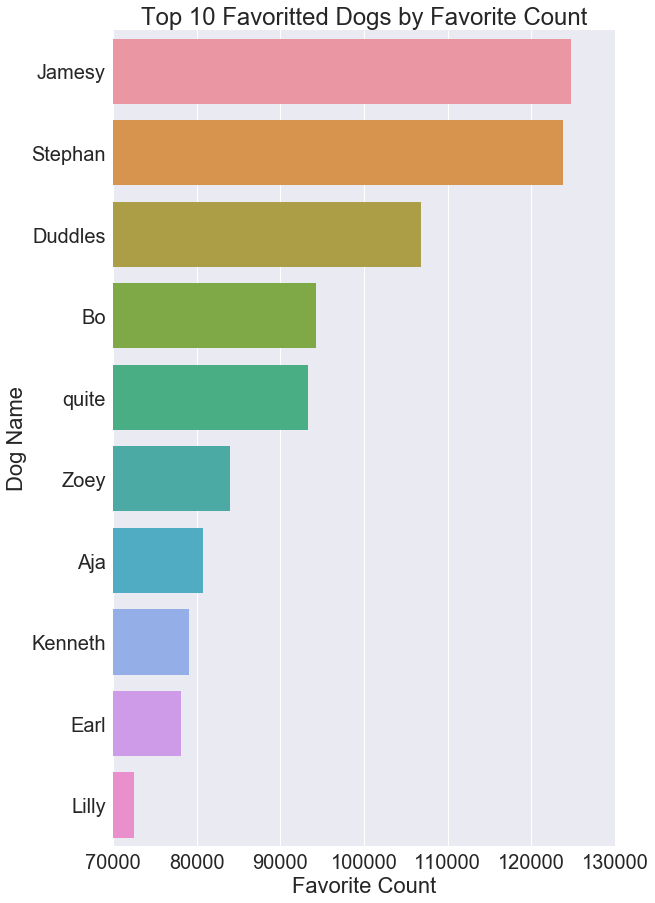

In [1259]:

# Create a dataset that contains the top 10 favoritted dogs
df_top10 = df_top10.nlargest(10,'favorite_count')

#Plot the top favorited dogs
sns.set(style="whitegrid");
sns.set(font_scale=2);
f, ax = plt.subplots(figsize=(9, 15));
ax = sns.barplot(x='favorite_count', y='name', data=df_top10);

ax.set(xlim=(70000,130000), ylabel="Dog Name", xlabel="Favorite Count");
plt.title('Top 10 Favoritted Dogs by Favorite Count');



This visualization shows the top favorited dog by favorite count for named dogs. For this reason, the result found in Insight #2 – Top favorite count of a tweet is not listed part of this visualization

The top favorited dog is named Jamesy and he earned 124742 favorite counts

## Visualization #2 - Successful Breed Prediction for Algorithm P1

In [1260]:
#Filter out failed predictions
df_p1 = tweets_predictions_all[tweets_predictions_all['p1_dog'] == True]


In [1261]:
# Store the count of the successful predictions in successful_p1
successful_p1 = df_p1.groupby('p1').p1_dog.count()

In [1262]:
# Create a dataset that contains breed and count for algorithem P1 successfully predicted breeds
successful_predictions = pd.DataFrame({'breed':successful_p1.index, 'count':successful_p1.values})

E:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


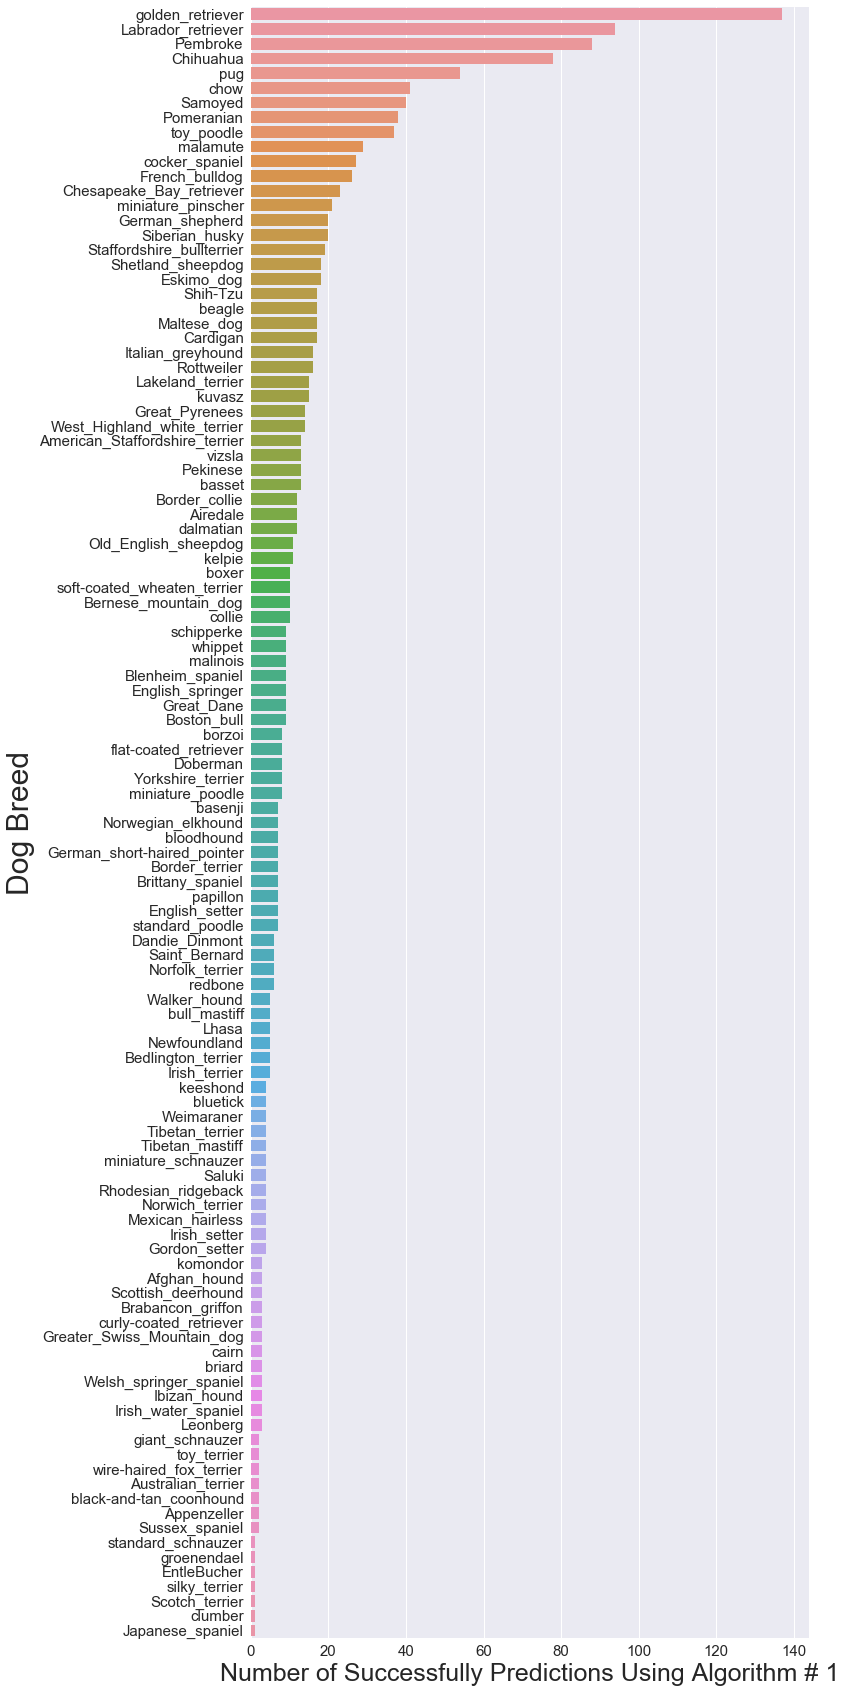

In [1263]:
sns.set(style="whitegrid")

sns.set(font_scale=1.5)

f, ax = plt.subplots(figsize=(10, 30))

sns.set_color_codes("dark")
sns.barplot(x="count", y="breed", data=successful_predictions.sort_values("count", ascending=False),label="Total");

ax.set_xlabel("Number of Successfully Predictions Using Algorithm # 1",fontsize=25)
ax.set_ylabel("Dog Breed",fontsize=30)
sns.despine(left=True, bottom=True)

This visualization shows the successful breed prediction when using the algorithm P1. The algorithm highest successful breed prediction is Golden Retriever which was successfully predicted 148 times. However, the lowest successful breed predictions are standard_schnauzer, groenendael, EntleBucher, silky_terrier, Scotch_terrier, clumber, and Japanese_spaniel which were successfully predicted 1 time only

# References
https://www.digitalocean.com/community/tutorials/how-to-authenticate-a-python-application-with-twitter-using-tweepy-on-ubuntu-14-04

https://stackoverflow.com/questions/42384118/how-to-get-distinct-value-while-using-apply-join-in-pandas-dataframe

https://seaborn.pydata.org/examples/horizontal_barplot.html

https://guides.github.com/pdfs/markdown-cheatsheet-online.pdf